# Introducción

En el presente documento se explorarán diferentes arquitecturas de modelos de tipo Red Neuronal Convolucional (Convolutional Neural Network - CNN) para la tarea de clasificación de células inmunitarias a partir de imágenes por microscopio, en 4 tipos diferentes:
* Eosinófilos
* Neutrófilos
* Monocitos
* Linfocitos

Esta tarea es de relevancia dado que estas células desempeñan funciones importantes en el sistema inmunitario, ya que son la primera línea de protección contra enfermedades y patógenos, ya que trabajan en conjunto para identificar y combatir bacterias, virus, hongos, entre otros invasores del cuerpo humano.

Estas células tienen la capacidad de memorizar a los agentes externos previamente identificados en el organismo humano, lo que ayuda a crear inmunidad a enfermedades específicas a lo largo de la vida. De la misma manera, se encarga de mantener un control y equilibrio en el cuerpo humano, evitando así la propagación de infecciones y promoviendo la regeneración de tejidos.

### Funciones de cada tipo de célula

* Eosinófilos: Estas células reaccionan contra infecciones de tipo parasitario o alérgicas. Algunos ejemplos son los parásitos multicelulares o la alergia al polvo. También ayuda reduciendo la inflamación.
* Neutrófilos: Este tipo de células conforman la primera línea de protección contra las infecciones.
* Monocitos: Vienen de la célula madre (macrófago), contienen antígenos de las células no deseadas, que presentan a los linfocitos para atacar la enfermedad.
* Linfocitos: La célula de respuesta directa, que produce proteínas para combatir las infecciones. Se subdividen en 3 diferentes tipos:

  * Células B, que se encargan de formar la médula ósea y se agrupan en los ganglios linfáticos, producen anticuerpos y dan instrucciones a las células T para atacar la infección.
  * Células T, se forman en la médula ósea y se dirigen al timo, reconocen virus específicos y reaccionan ante ellos de manera similar a los anticuerpos.
  * Células NK (Natural Killers), las células que contienen enzimas y son capaces de acabar con materiales altamente nocivos. No diferencian entre diferentes tipos de células, por lo que indiscriminadamente terminan con cualquier cosa que se encuentren a su paso, ya que no necesitan antígenos para ser activadas.


### Importancia del modelo de Inteligencia Artificial en el ámbito médico

El análisis de las células inmunitarias resulta esencial en el diagnóstico y tratamiento de enfermedades infecciosas, transtornos inmunitarios (enfermedades autoinmunitarias e inmunodeficiencias) y ciertos tipos de cáncer. Así mismo, permite una evaluación externa de la eficacia de las terapias y fármacos para el paciente previamente diagnosticado. Del mismo modo, su importancia radica en el desarrollo de nuevos fármacos y terapias efectivas bajo un mejor entendimiento de las células inmunitarias, facilitando el desarrollo de las mismas, y abarcando una visión más centrada acerca de la prevención de enfermedades infecciosas.

El modelo propuesto es de ayuda para la rápida identificación de estas células inmunitarias, agilizando el proceso.

Referencias:

Cleveland Clinic. (2022). _Eosinophils._ Clieveland Clinic. https://my.clevelandclinic.org/health/body/23402-eosinophils

Cleveland Clinic. (2022). _Lymphocytes._ Clieveland Clinic. https://my.clevelandclinic.org/health/body/23342-lymphocytes

Cleveland Clinic. (2022). _Neutrophils._ Clieveland Clinic. https://my.clevelandclinic.org/health/body/22313-neutrophils

Cleveland Clinic. (2021). _Monocytes._ Clieveland Clinic. https://my.clevelandclinic.org/health/body/22110-monocytes




# Lectura y preparación del dataset

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
# Check kaggle is working
!kaggle datasets list

ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          21568        451  1.0              
samyakb/student-stress-factors                              Student stress factors                            887B  2023-11-02 12:42:11           2282         52  0.9411765        
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)           139KB  2023-09-29 13:39:28          11860        287  1.0              
adeolaadesina/factors-affecting-children-anemia-level       Factors Affecting Children Anemia L

In [3]:
!kaggle datasets download -d paultimothymooney/blood-cells

 92% 100M/108M [00:00<00:00, 122MB/s] 
100% 108M/108M [00:00<00:00, 118MB/s]


In [4]:
!unzip -qq blood-cells.zip

In [5]:
# Divide the training set into training and validation
import os
import random
import shutil

validation_path = "dataset2-master/dataset2-master/images/VALIDATION"
os.makedirs(validation_path, exist_ok=True)

## Visualización de las imágenes

In [6]:
train_path = "dataset2-master/dataset2-master/images/TRAIN"
test_path = "dataset2-master/dataset2-master/images/TEST"
class_folders = os.listdir(train_path)
class_folders

['NEUTROPHIL', 'MONOCYTE', 'LYMPHOCYTE', 'EOSINOPHIL']

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_first_image(folder_path):
  image_files = os.listdir(folder_path)
  first_image_path = os.path.join(folder_path, image_files[0])
  img = np.asarray(Image.open(first_image_path))
  return img

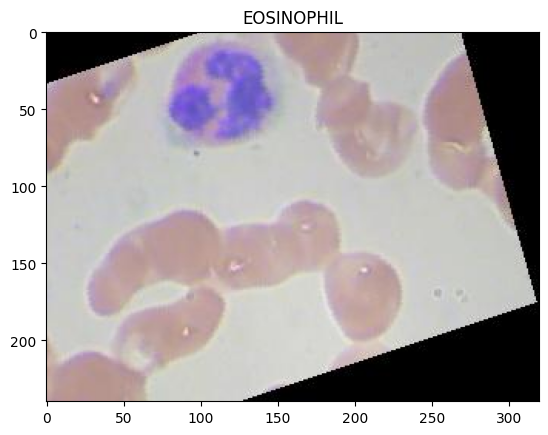

In [ ]:
img = load_first_image(os.path.join(train_path, class_folders[0]))
plt.title(class_folders[0])
plt.imshow(img)

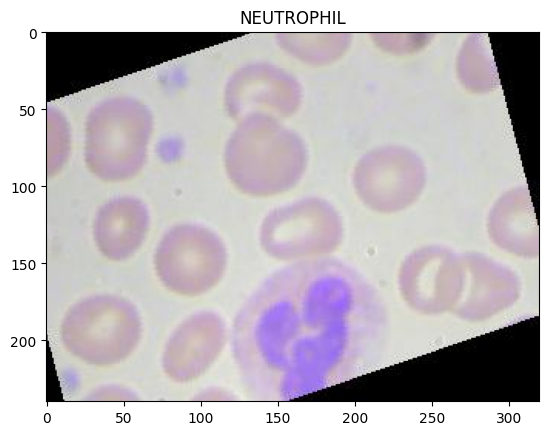

In [ ]:
img = load_first_image(os.path.join(train_path, class_folders[1]))
plt.title(class_folders[1])
plt.imshow(img)

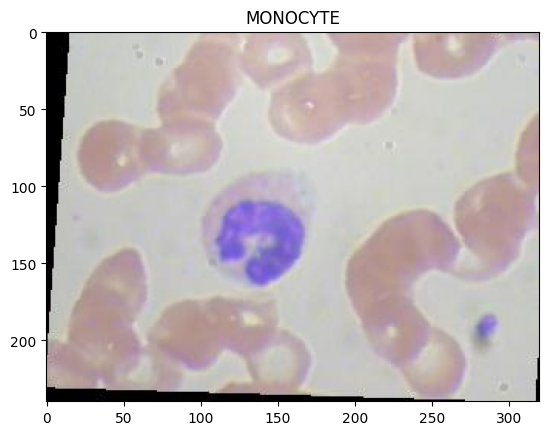

In [ ]:
img = load_first_image(os.path.join(train_path, class_folders[2]))
plt.title(class_folders[2])
plt.imshow(img)

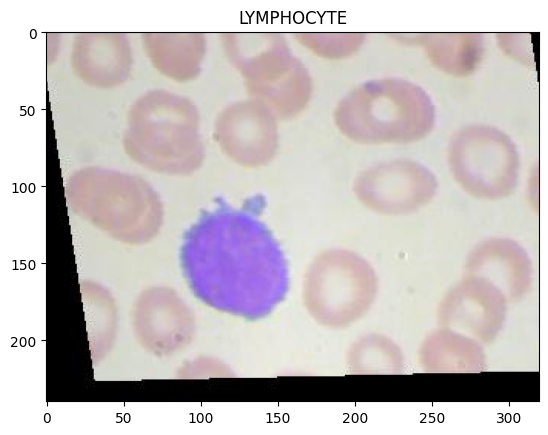

In [ ]:
img = load_first_image(os.path.join(train_path, class_folders[3]))
plt.title(class_folders[3])
plt.imshow(img)

In [8]:
all_image_files = os.listdir(os.path.join(train_path, "EOSINOPHIL"))
len(all_image_files)

2497

## División del dataset de entrenamiento en entrenamiento y validación

In [9]:
for class_folder in class_folders:
  train_class_path = os.path.join(train_path, class_folder)
  all_image_files = os.listdir(train_class_path)
  num_image_files = len(all_image_files)
  num_training = int(0.8 * num_image_files)
  num_validation = num_image_files - num_training

  random.shuffle(all_image_files)
  valid_class_path = os.path.join(validation_path, class_folder)
  os.makedirs(valid_class_path, exist_ok=True)

  for i, image_file in enumerate(all_image_files):
    src_path = os.path.join(train_class_path, image_file)

    if i < num_training:
      dst_path = os.path.join(train_class_path, image_file)
    else:
      dst_path = os.path.join(valid_class_path, image_file)
      shutil.copy(src_path, dst_path)
      os.remove(src_path)



In [10]:
all_image_files = os.listdir(os.path.join(train_path, "EOSINOPHIL"))
len(all_image_files)

1997

In [11]:
all_image_files = os.listdir(os.path.join(validation_path, "EOSINOPHIL"))
len(all_image_files)

500

In [12]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(240, 320),
    batch_size=32)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    image_size=(240, 320),
    batch_size=32)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(240, 320),
    batch_size=32)


Found 7964 files belonging to 4 classes.
Found 1993 files belonging to 4 classes.
Found 2487 files belonging to 4 classes.


In [13]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 240, 320, 3)
labels batch shape: (32,)


In [14]:
# Create a smaller dataset for train testing
train_small = train_dataset.take(10)
val_small = val_dataset.take(10)
test_small = test_dataset.take(10)

# Desarrollo y ajuste del modelo

## Primer modelo

El primer modelo consistirá de una red neuronal convolucional con 3 capas de convolución y 3 capas de MaxPooling para reducir el tamaño de la imagen, así como dos capas densas, la última de ellas con 4 neuronas y activación "softmax", ya que lo que queremos resolver es una tarea de clasificación.

In [15]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[240, 320, 3]),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=32, kernel_size=11, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),
    tf.keras.layers.Conv2D(filters=128, kernel_size=5, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 240, 320, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 230, 310, 32)      11648     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 56, 64)        100416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 14, 128)        2

En este caso, utilizaremos la función de pérdida de sparse_categorical_crossentropy, ya que lo que se requiere resolver es una tarea de clasificación.

In [ ]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
               metrics=["accuracy"])

In [ ]:
train_small.cardinality().numpy()

10

In [ ]:
train_dataset.cardinality().numpy()

249

In [ ]:
history1 = model1.fit(train_small, epochs=10,
                      validation_data=val_small)

Epoch 1/10
10/10 [==============================] - 131s 13s/step - loss: 1.3818 - accuracy: 0.2625 - val_loss: 1.4086 - val_accuracy: 0.2219
Epoch 2/10
10/10 [==============================] - 145s 15s/step - loss: 1.3840 - accuracy: 0.2625 - val_loss: 1.3875 - val_accuracy: 0.2344
Epoch 3/10
10/10 [==============================] - 144s 15s/step - loss: 1.3840 - accuracy: 0.2594 - val_loss: 1.3873 - val_accuracy: 0.2531
Epoch 4/10
10/10 [==============================] - 143s 15s/step - loss: 1.3826 - accuracy: 0.2781 - val_loss: 1.3885 - val_accuracy: 0.2750
Epoch 5/10
10/10 [==============================] - 145s 15s/step - loss: 1.3766 - accuracy: 0.2969 - val_loss: 1.4042 - val_accuracy: 0.2875
Epoch 6/10
10/10 [==============================] - 146s 15s/step - loss: 1.3861 - accuracy: 0.2969 - val_loss: 1.4085 - val_accuracy: 0.2531
Epoch 7/10
10/10 [==============================] - 147s 15s/step - loss: 1.3785 - accuracy: 0.2781 - val_loss: 1.3985 - val_accuracy: 0.2656
Epoch 

Observamos que dada la simplicidad del modelo, existe un fenómeno de underfitting que debemos superar. Para este fin, se intentará incrementar el número de capas y parámetros.

## Segundo modelo

In [16]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[240, 320, 3]),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=1024, kernel_size=3, activation="relu"),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 238, 318, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 119, 159, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 117, 157, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 78, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 76, 128)      

In [ ]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
               metrics=["accuracy"])

In [ ]:
history2 = model2.fit(train_small, epochs=10,
                      validation_data=val_small)

Epoch 1/10
10/10 [==============================] - 183s 19s/step - loss: 1.4340 - accuracy: 0.2906 - val_loss: 1.3852 - val_accuracy: 0.2750
Epoch 2/10
10/10 [==============================] - 143s 14s/step - loss: 1.3941 - accuracy: 0.2125 - val_loss: 1.3854 - val_accuracy: 0.2531
Epoch 3/10
10/10 [==============================] - 160s 16s/step - loss: 1.3867 - accuracy: 0.2469 - val_loss: 1.3857 - val_accuracy: 0.2719
Epoch 4/10
10/10 [==============================] - 139s 14s/step - loss: 1.3853 - accuracy: 0.2844 - val_loss: 1.3862 - val_accuracy: 0.2594
Epoch 5/10
10/10 [==============================] - 135s 14s/step - loss: 1.3850 - accuracy: 0.2812 - val_loss: 1.3876 - val_accuracy: 0.2531
Epoch 6/10
10/10 [==============================] - 125s 13s/step - loss: 1.3882 - accuracy: 0.2438 - val_loss: 1.3845 - val_accuracy: 0.2719
Epoch 7/10
10/10 [==============================] - 136s 14s/step - loss: 1.3857 - accuracy: 0.2594 - val_loss: 1.3852 - val_accuracy: 0.2781
Epoch 

Para este punto, parece no muy realizable el entrenamiento desde 0 de la red neuronal, ya que se tomó 30 minutos el procesamiento de 10 epochs, solamente con un 5% del dataset total, y además, se consiguió un accuracy de solamente 0.26.

Por esta razón, intentaremos utilizar ahora un modelo preentrenado como base.

## Tercer modelo

In [17]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[240, 320, 3]),
    tf.keras.layers.Lambda(lambda x: tf.image.resize(x, (224, 224))),
    tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input),
    tf.keras.applications.ResNet50(weights="imagenet", include_top=False),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation="softmax")
])

model3.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 23,542,788
N

In [18]:
len(model3.layers[2].layers)

175

En este caso, al existir 175 capas en el modelo de ResNet50, solamente entrenaremos un pequeño porcentaje de las últimas capas, por ejemplo, 10 de ellas, mientras que todas las demás se quedarán fijas.

In [19]:
for i, layer in enumerate(model3.layers[2].layers):
  if i < 165:
    layer.trainable = False

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 4,473,860
Non-trainable params: 19,122,048
__________________________________

In [ ]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
               metrics=["accuracy"])

In [ ]:
history3 = model3.fit(train_small, epochs=10,
                      validation_data=val_small)

Epoch 1/10
10/10 [==============================] - 159s 16s/step - loss: 1.3813 - accuracy: 0.4875 - val_loss: 3.0780 - val_accuracy: 0.5719
Epoch 2/10
10/10 [==============================] - 126s 13s/step - loss: 0.5222 - accuracy: 0.8062 - val_loss: 15.1447 - val_accuracy: 0.5469
Epoch 3/10
10/10 [==============================] - 150s 16s/step - loss: 0.4073 - accuracy: 0.8625 - val_loss: 15.4242 - val_accuracy: 0.5219
Epoch 4/10
10/10 [==============================] - 151s 16s/step - loss: 0.1946 - accuracy: 0.9187 - val_loss: 9.3196 - val_accuracy: 0.5906
Epoch 5/10
10/10 [==============================] - 152s 16s/step - loss: 0.1195 - accuracy: 0.9594 - val_loss: 8.8725 - val_accuracy: 0.5437
Epoch 6/10
10/10 [==============================] - 133s 14s/step - loss: 0.0963 - accuracy: 0.9719 - val_loss: 5.5566 - val_accuracy: 0.6156
Epoch 7/10
10/10 [==============================] - 150s 16s/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 2.2192 - val_accuracy: 0.7312
Epoc

Este modelo se ve mucho más prometedor, ya que observamos cómo el accuracy tanto en el dataset de entrenamiento ha aumentado significativamente dado el incremento en el número de parámetros, y que se utilizan pesos preentrenados.

Sin embargo, ahora observamos que después de unas cuantas epochs, sucede un fenómeno de overfitting. Para este momento, eso se puede atribuir a que no utilizamos el dataset completo, así que esa será la siguiente tarea.

## Entrenamiento con el dataset completo

In [ ]:
history4 = model3.fit(train_dataset, epochs=2,
                      validation_data=val_dataset)

Epoch 1/2
249/249 [==============================] - 2412s 10s/step - loss: 0.3186 - accuracy: 0.8752 - val_loss: 1.9122 - val_accuracy: 0.6593
Epoch 2/2
249/249 [==============================] - 2366s 10s/step - loss: 0.0937 - accuracy: 0.9655 - val_loss: 0.2335 - val_accuracy: 0.9157


Observamos que en este caso, aumentó bastante el valor de accuracy en el dataset de validación. Por lo tanto, consideraremos a este el modelo final.

In [ ]:
model3.save("model3_1.keras")

In [22]:
model4 = tf.keras.models.load_model("model3_1.keras")

# Resultados

Ahora procedemos a realizar la predicciones con el modelo en el dataset de testing.

In [23]:
y_true = []
y_pred = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())
    y_pred.extend(tf.argmax(model4.predict(images), axis=-1).numpy())

1/1 [==============================] - 5s 5s/step


In [52]:
images_first_batch, true_labels_first_batch = list(test_dataset.take(1))[0]

In [54]:
predicted_labels_first_batch = np.argmax(model4.predict(images_first_batch), axis=-1)

1/1 [==============================] - 9s 9s/step


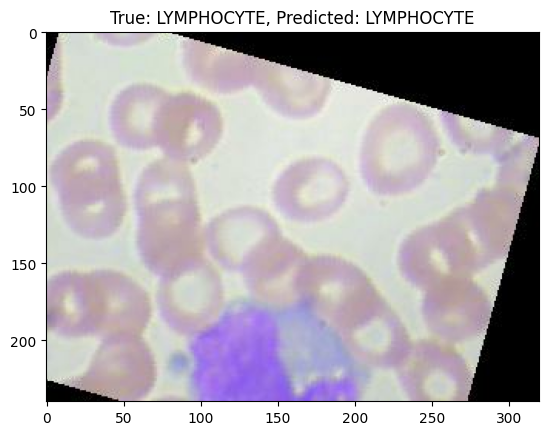

In [55]:
true_label = class_folders[true_labels_first_batch[0]]
predicted_label = class_folders[predicted_labels_first_batch[0]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[0].numpy().astype(int))


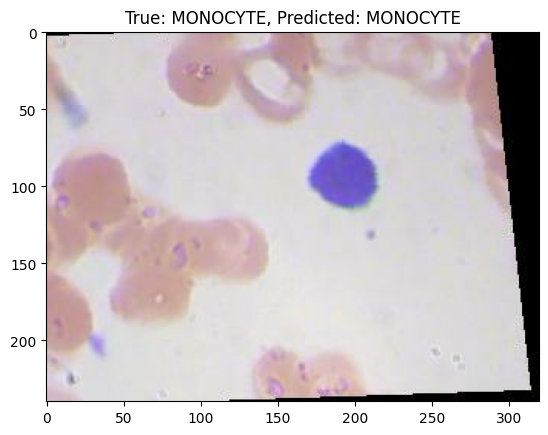

In [56]:
true_label = class_folders[true_labels_first_batch[1]]
predicted_label = class_folders[predicted_labels_first_batch[1]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[1].numpy().astype(int))


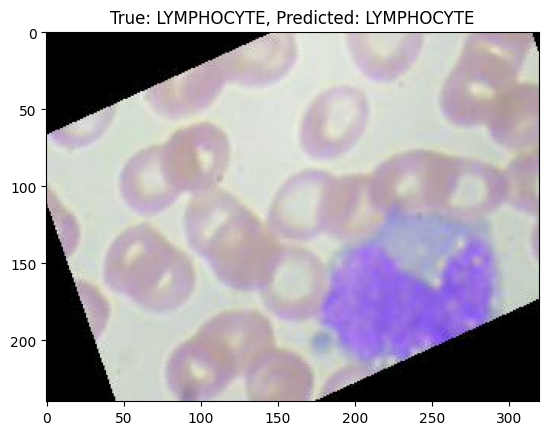

In [57]:
true_label = class_folders[true_labels_first_batch[2]]
predicted_label = class_folders[predicted_labels_first_batch[2]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[2].numpy().astype(int))


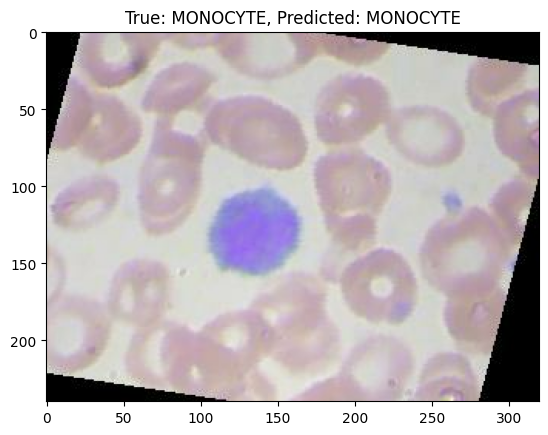

In [58]:
true_label = class_folders[true_labels_first_batch[3]]
predicted_label = class_folders[predicted_labels_first_batch[3]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[3].numpy().astype(int))


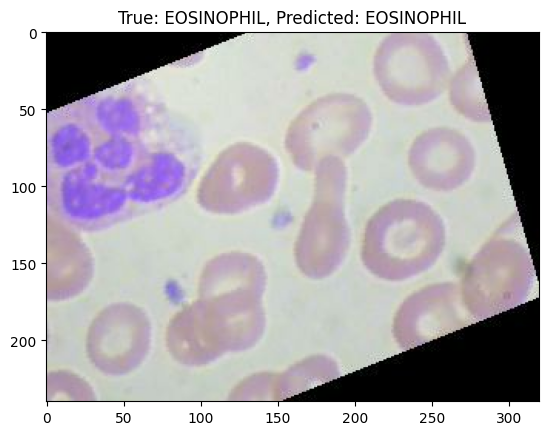

In [59]:
true_label = class_folders[true_labels_first_batch[4]]
predicted_label = class_folders[predicted_labels_first_batch[4]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[4].numpy().astype(int))


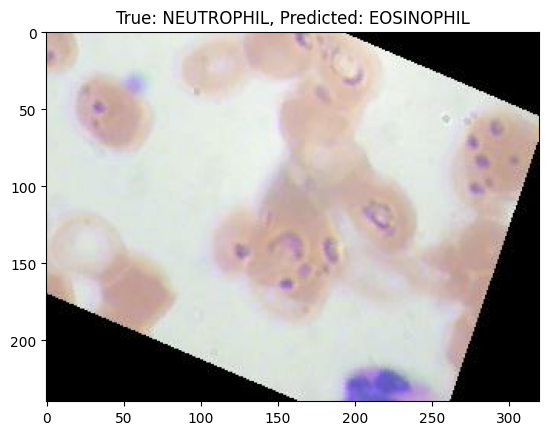

In [67]:
true_label = class_folders[true_labels_first_batch[5]]
predicted_label = class_folders[predicted_labels_first_batch[5]]
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.imshow(images_first_batch[5].numpy().astype(int))


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print("Accuracy score: ", accuracy_score(y_true, y_pred))

Accuracy score:  0.7157217531162042


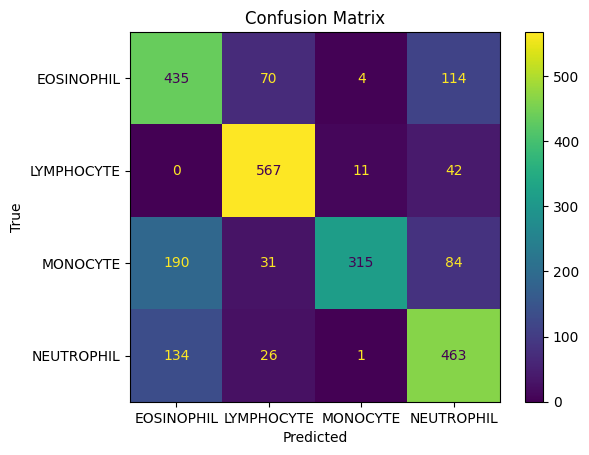

In [69]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=train_dataset.class_names)

disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


De la matriz de confusión podemos observar que la gran mayoría de la las predicciones son correctas, pero el modelo tiende a predecir un eosinofilo cuando en realidad es un monocito o un neutrófilo.

In [70]:
report = classification_report(y_true,
                               y_pred,
                               target_names=train_dataset.class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  EOSINOPHIL       0.57      0.70      0.63       623
  LYMPHOCYTE       0.82      0.91      0.86       620
    MONOCYTE       0.95      0.51      0.66       620
  NEUTROPHIL       0.66      0.74      0.70       624

    accuracy                           0.72      2487
   macro avg       0.75      0.72      0.71      2487
weighted avg       0.75      0.72      0.71      2487



# Conclusiones

La red neuronal convolucional final tuvo bastante mejor desempeño que las redes anteriores, que no utilizaron transfer learning. Este ejemplo muestra por qué a veces es más sencillo entrenar redes que ya utilizan pesos pre-entrenados con un gran dataset y solamente modificar las últimas. En realidad, es muy notoria la diferencia, de tan solo 0.28 accuracy en validación a 0.91.

El modelo final tuvo un desempeño de 0.71 en el dataset de testing.

El trabajo futuro es continuar entrenando el modelo final por más tiempo, ya que seguramente esto haría que se consiguieran mejores métricas. Sin embargo, este es un trabajo costoso para el que se le deberán asignar recursos.